# Data on global shark attacks (GSAF)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use('default')
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

/home/koen/anaconda3/envs/bunnies/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
shark_df_raw = pd.read_excel('data/GSAF5.xls')

In [3]:
colnames = shark_df_raw.columns.values
print "The dataset has the following columns:"
print colnames
print ""
print shark_df_raw[colnames[:16]][0:5]

The dataset has the following columns:
[u'Case Number' u'Date' u'Year' u'Type' u'Country' u'Area' u'Location'
 u'Activity' u'Name' u'Sex ' u'Age' u'Injury' u'Fatal (Y/N)' u'Time'
 u'Species ' u'Investigator or Source' u'pdf' u'href formula' u'href'
 u'Case Number.1' u'Case Number.2' u'original order' 'Unnamed: 22'
 'Unnamed: 23']

    Case Number         Date    Year        Type       Country  \
0    2017.02.11  11-Feb-2017  2017.0  Unprovoked           USA   
1  2017.02.06.b  06-Feb-2017  2017.0    Provoked        BRAZIL   
2  2017.02.06.a  06-Feb-2017  2017.0        Boat  SOUTH AFRICA   
3  2017.02.01.b  01-Feb-2017  2017.0        Boat           USA   
4  2017.02.01.a  01-Feb-2017  2017.0  Unprovoked       BAHAMAS   

             Area                         Location  \
0         Florida  Melbourne Beach, Brevard County   
1      Pernambuco  Fernando de Noronha Marine Park   
2   KwaZulu-Natal          Eastmoor Crescent Beach   
3  South Carolina         16 miles off Hilton Head   


In [4]:
print "Length data set before NaN filtering: {}\n".format(len(shark_df_raw))

# Filter the NaN on the 'Date' column, because all reports should have a date
shark_df_nanfilt = shark_df_raw.notnull()
print "Show some entries which are null or notnull:"
print shark_df_nanfilt[colnames[:16]][0:5]

Length data set before NaN filtering: 25591

Show some entries which are null or notnull:
  Case Number  Date  Year  Type Country  Area Location Activity  Name   Sex   \
0        True  True  True  True    True  True     True     True  True   True   
1        True  True  True  True    True  True     True     True  True   True   
2        True  True  True  True    True  True     True     True  True   True   
3        True  True  True  True    True  True     True     True  True  False   
4        True  True  True  True    True  True    False     True  True   True   

     Age Injury Fatal (Y/N)   Time Species  Investigator or Source  
0   True   True        True   True    False                   True  
1  False   True        True   True     True                   True  
2  False   True        True  False     True                   True  
3  False   True        True  False     True                   True  
4   True   True        True  False     True                   True  


In [5]:
# Filtering out the rows where there is no date info
shark_df_datefilt = shark_df_raw[shark_df_nanfilt['Date'] == True]
print "\nLength data set after NaN filtering of the 'Date' column: {}".format(len(shark_df_datefilt))


Length data set after NaN filtering of the 'Date' column: 6035


In [6]:
# Selecting everything from 1950 onwards, but excluding 2017 (because we want whole year records)
shark_df_yearfilt = shark_df_datefilt[(shark_df_datefilt['Year'] > 1949) & (shark_df_datefilt['Year'] < 2017)]
print "All records from 1950: {}".format(len(shark_df_yearfilt))

All records from 1950: 4301


In [7]:
print shark_df_yearfilt[['Date','Year','Type','Activity','Species ']][:5]

           Date    Year        Type      Activity          Species 
13  27-Dec-2016  2016.0  Unprovoked       Surfing               NaN
14  24-Dec-2016  2016.0  Unprovoked    Snorkeling     a small shark
15  19-Dec-2016  2016.0  Unprovoked  Surf skiing   White shark, 4 m
16  14-Dec-2016  2016.0  Unprovoked   Free diving               NaN
17  11-Dec-2016  2016.0     Invalid       Surfing               NaN


## Sanity Check
**Up till now the total numbers match with the GSAF.xls record!**

In [8]:
# Filtering out the 'Invalid' and NaN types for 'Type' of attack
shark_df_typefilt = shark_df_yearfilt.notnull()

# Removing the NaN fields from 'Type' column
shark_df_types = shark_df_yearfilt[shark_df_typefilt['Type'] == True]
print "\nLength data set after NaN filtering of the 'Type' column: {}\n".format(len(shark_df_types))

# Taking a look at the attacks which are questionable (Invalid)
print "Looking at questionable attacks:"
invalid_type_df = shark_df_types[shark_df_types['Type'] == 'Invalid']
print invalid_type_df[['Date','Type','Activity','Injury','Species ']][:4]
print "\nTotal invalid (questionable) types of atacks: {}".format(len(invalid_type_df))

# Removing the Invalid attacks and use the new DataFrame for analysis
print "\nThe filtered DataFrame:"
shark_df = shark_df_types[shark_df_types['Type'] != 'Invalid']
print shark_df[['Date','Type','Activity','Injury','Species ']][:4]
print "\nTotal entries we're going to work with: {}".format(len(shark_df))


Length data set after NaN filtering of the 'Type' column: 4300

Looking at questionable attacks:
           Date     Type     Activity  \
17  11-Dec-2016  Invalid      Surfing   
29  13-Oct-2016  Invalid  Cage Diving   
49     Sep-2016  Invalid  Cage Diving   
88  07-Jun-2016  Invalid      Surfing   

                                      Injury  \
17                Cuts to right ankle & foot   
29   Shark breached cage, no injury to diver   
49  No injury to divers, shark breached cage   
88                  No injury, board damaged   

                                             Species   
17                                                NaN  
29                                        White shark  
49                                        White shark  
88  Said to involve an 8' shark but more likely da...  

Total invalid (questionable) types of atacks: 357

The filtered DataFrame:
           Date        Type      Activity  \
13  27-Dec-2016  Unprovoked       Surfing   
14  24-De

## Sanity Check

**Number of valid + invalid + the one NaN removal adds up to 4300**

**Going to work with 3942 reports**

In [9]:
# It turns out that some entries are not in their own year block (a 2015 among 2014, a 1984 among 1995, 
# a 1971 among 1961)
year_check = float(shark_df['Year'][:1])
print year_check
for year in shark_df['Year']:
    
    diff = year_check - year
    if( diff == 1):
        year_check = year
    elif (diff > 1):
        print ''
        print year_check
        print year
        year_check = year
    elif (diff < 0):
        print ''
        print year_check
        print year
        year_check = year

2016.0

2014.0
2015.0

1995.0
1984.0

1984.0
1995.0

1961.0
1971.0

1971.0
1961.0


In [10]:
# Total amount of unique entries (unfiltered)
print "Unique entries"
print "Type of attacks: {}".format(len(shark_df['Type'].unique()))
print shark_df['Type'].unique()
print "Countries: {}".format(len(shark_df.Country.unique()))
print "Areas: {}".format(len(shark_df.Area.unique()))
print "Location: {}".format(len(shark_df.Location.unique()))
print "Activities: {}".format(len(shark_df.Activity.unique()))
print "Shark Species: {}".format(len(shark_df['Species '].unique()))

Unique entries
Type of attacks: 5
[u'Unprovoked' u'Provoked' u'Boat' u'Sea Disaster' u'Boating']
Countries: 141
Areas: 514
Location: 2692
Activities: 880
Shark Species: 1271


In [11]:
# Check the Species columns
print shark_df['Species '][:10]

13                                 NaN
14                       a small shark
15                    White shark, 4 m
16                                 NaN
18                                 NaN
19                 Wobbegong shark, 2m
20                         White shark
21    Broadnose sevengill shark, 1.5 m
22                         Tiger shark
23                                 NaN
Name: Species , dtype: object


In [12]:
#Replacing NaNs by 'Unspecified'
shark_df.loc[:,'Species '] = shark_df.loc[:,'Species '].fillna('Unspecified')
print shark_df['Species '][:10]

13                         Unspecified
14                       a small shark
15                    White shark, 4 m
16                         Unspecified
18                         Unspecified
19                 Wobbegong shark, 2m
20                         White shark
21    Broadnose sevengill shark, 1.5 m
22                         Tiger shark
23                         Unspecified
Name: Species , dtype: object


/home/koen/anaconda3/envs/bunnies/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
# Count the different type of species and order them in descending order
print "Total: {}".format(len(shark_df))
print shark_df['Species '].value_counts()[:10]

Total: 3943
Unspecified         1515
White shark          141
Tiger shark           48
Bull shark            40
4' shark              37
6' shark              31
1.8 m [6'] shark      31
1.5 m [5'] shark      25
1.2 m [4'] shark      25
3' shark              22
Name: Species , dtype: int64


**So for about 38.5% of the attacks the 'Species' field was empty (NaN) was involved**

In [14]:
# Create function to group the same species together
def filterSpecies(inputString,test=False):
    
    # make input lower case
    checkString = inputString.lower()
    
    # list of most likely shark species
    sharklist = ['white shark','bull shark','hammerhead shark','tiger shark',\
                 'wobbegong shark','sevengill shark','nurse shark','mako shark',\
                 'blue shark','zambezi shark','whaler shark','blacktip shark',\
                 'bonita shark','reef shark', 'lemon shark', 'angel shark',\
                 'dogfish shark','spinner shark','goblin shark','whale shark',\
                 'silky shark','zambesi shark','raggedtooth shark']
    
    species = ''
    for shark in sharklist:
        if shark in checkString:
            species = shark
            break
            
    if(species == ''):
        species = 'Unspecified'
            
    if(test):
        print species
        
    return species

In [15]:
test = "White shark, 2 m to 4 m [6'9\" to 13']"
filterSpecies(test,True)
test2 = "Bronze whaler shark, 2 m"
filterSpecies(test2,True)
test3 = "Unspecified"
filterSpecies(test3,True)
test4 = "1.8 m [6'] shark"
filterSpecies(test4,True)

white shark
whaler shark
Unspecified
Unspecified


'Unspecified'

In [16]:
# Adding a column where the species are filtered
shark_df.loc[:,'Species filtered'] = shark_df.loc[:,'Species '].apply(filterSpecies)
print shark_df['Species filtered'][:15]

13        Unspecified
14        Unspecified
15        white shark
16        Unspecified
18        Unspecified
19    wobbegong shark
20        white shark
21    sevengill shark
22        tiger shark
23        Unspecified
24        Unspecified
25        Unspecified
26        Unspecified
27        Unspecified
28        Unspecified
Name: Species filtered, dtype: object


/home/koen/anaconda3/envs/bunnies/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [17]:
# Count again the different type of species and order them in descending order
print "Total: {}".format(len(shark_df))
print shark_df['Species filtered'].value_counts()[:10]

Total: 3943
Unspecified       2439
white shark        551
tiger shark        216
bull shark         151
nurse shark         79
reef shark          62
whaler shark        61
blacktip shark      59
mako shark          46
spinner shark       42
Name: Species filtered, dtype: int64


**The species are more grouped together now and the Unspedified now takes up 69.7% of the total attacks**

**White sharks only take up 10.9% of the attack**

In [18]:
# Check the Unspecified species
check_unspec = shark_df[shark_df['Species filtered'] == 'Unspecified']
print check_unspec['Species '].value_counts()[0:25]

Unspecified                        1515
4' shark                             37
6' shark                             31
1.8 m [6'] shark                     31
1.5 m [5'] shark                     25
1.2 m [4'] shark                     25
3' shark                             22
4' to 5' shark                       21
3' to 4' shark                       18
2 m shark                            18
5' shark                             18
3 m shark                            16
1.2 m to 1.5 m [4' to 5'] shark      13
3 m [10'] shark                      13
2.4 m [8'] shark                     13
1.5 m shark                          12
3.7 m [12'] shark                    11
"a small shark"                      11
1 m shark                             9
"small shark"                         8
a small shark                         8
Unidentified species                  8
2' to 3' shark                        8
7' shark                              7
Shark involvement not confirmed       7


In [19]:
# Creating a dataframe with attacks from 2000 onwards
shark_df_2000 = shark_df[shark_df['Year'] > 1999]
shark_df_19s = shark_df[shark_df['Year'] <= 1999]

print "Total from 1950: {}".format(len(shark_df))
print "Total from 2000 onwards: {}".format(len(shark_df_2000))
print "Total before 2000 (sanity check): {}\n".format(len(shark_df_19s))

print "The top from 2000 on:"
print shark_df_2000['Species filtered'].value_counts()[0:11]

Total from 1950: 3943
Total from 2000 onwards: 1731
Total before 2000 (sanity check): 2212

The top from 2000 on:
Unspecified        1026
white shark         209
bull shark          113
tiger shark         112
reef shark           39
blacktip shark       33
whaler shark         32
nurse shark          29
spinner shark        28
mako shark           22
wobbegong shark      17
Name: Species filtered, dtype: int64


In [20]:
# Checking the first 5 and last 5 entries
selcolumns = ['Date','Year','Type','Country','Activity','Fatal (Y/N)','Species filtered']
print shark_df_2000[selcolumns][0:5]
print shark_df_2000[selcolumns][-5:]

           Date    Year        Type       Country      Activity Fatal (Y/N)  \
13  27-Dec-2016  2016.0  Unprovoked           USA       Surfing           N   
14  24-Dec-2016  2016.0  Unprovoked     AUSTRALIA    Snorkeling           N   
15  19-Dec-2016  2016.0  Unprovoked  SOUTH AFRICA  Surf skiing            N   
16  14-Dec-2016  2016.0  Unprovoked     AUSTRALIA   Free diving           N   
18  10-Dec-2016  2016.0  Unprovoked       England   Windsurfing           N   

   Species filtered  
13      Unspecified  
14      Unspecified  
15      white shark  
16      Unspecified  
18      Unspecified  
                      Date    Year        Type      Country  \
1892           03-Feb-2000  2000.0  Unprovoked  NEW ZEALAND   
1893           01-Feb-2000  2000.0  Unprovoked    AUSTRALIA   
1894  Reported 28-Jan-2000  2000.0        Boat      REUNION   
1895           05-Jan-2000  2000.0  Unprovoked     THAILAND   
1896                  2000  2000.0        Boat          USA   

              

In [21]:
# Create a pandas Series for the number of attacks per year by a certain species
def createYearOverviewSpecies(df,species):
    
    species_record = df.groupby(['Species filtered']).get_group(species)
    year_groupby = species_record.groupby(['Year'])
    year_totals = year_groupby.size()

    return year_totals


Lengths of the projected frames, for 1950 - 2016 it should be 67 and starting from 2000 it should be 17
67
17
Overview from the last 70 years:
        white shark  bull shark
Year                           
1950.0            6         NaN
1951.0            4         NaN
1952.0            3         1.0
1953.0            1         2.0
1954.0            2         3.0
1955.0            4         NaN
1956.0            8         NaN
1957.0            3         4.0
1958.0            4         NaN
1959.0           10         NaN
1960.0           11         2.0
1961.0            9         NaN
1962.0            8         NaN
1963.0            7         1.0
1964.0            8         NaN
1965.0            2         1.0
1966.0            5         NaN
1967.0            5         NaN
1968.0            4         2.0
1969.0            3         NaN
1970.0            2         NaN
1971.0            8         NaN
1972.0            6         NaN
1973.0            1         1.0
1974.0           13      

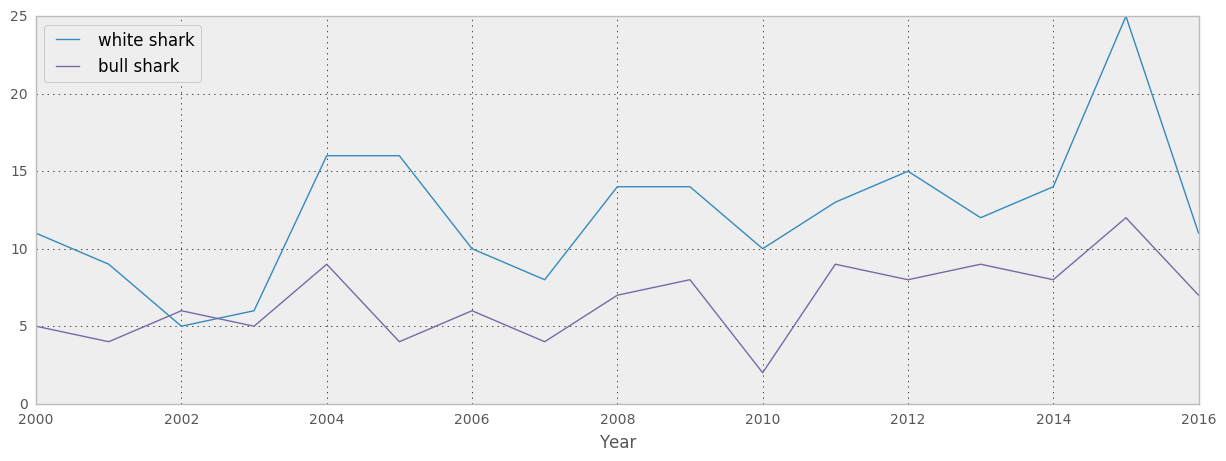

In [22]:
# Copy the 'Year' and 'Species filtered' columns to a new data frame
yearly_df = shark_df[['Year','Species filtered']].copy()
yearly_2000_df = shark_df_2000[['Year','Species filtered']].copy()

# Create the yearly overview for two shark species
top2_sharks = pd.DataFrame()
top2_sharks_2000 = pd.DataFrame()
white_attacks = createYearOverviewSpecies(yearly_df,'white shark')
bull_attacks = createYearOverviewSpecies(yearly_df,'bull shark')
white_attacks_2000 = createYearOverviewSpecies(yearly_2000_df,'white shark')
bull_attacks_2000 = createYearOverviewSpecies(yearly_2000_df,'bull shark')

# Adding the pandas Series to the dataframes
top2_sharks['white shark'] = white_attacks
top2_sharks['bull shark'] = bull_attacks
top2_sharks_2000['white shark'] = white_attacks_2000
top2_sharks_2000['bull shark'] = bull_attacks_2000

# Checking the lengths of the new data frames
print "Lengths of the projected frames, for 1950 - 2016 it should be 67 and starting from 2000 it should be 17"
print len(top2_sharks)
print len(top2_sharks_2000)

# Printing the yearly overview for the two species and printing the results
print "Overview from the last 70 years:"
print top2_sharks
top2_sharks_2000.plot()

67
        Unspecified  white shark  bull shark  tiger shark  reef shark
Year                                                                 
1950.0           27            6         NaN          1.0         1.0
1951.0           23            4         NaN          NaN         NaN
1952.0           21            3         1.0          1.0         NaN
1953.0           27            1         2.0          1.0         NaN
1954.0           29            2         3.0          NaN         1.0
1955.0           33            4         NaN          NaN         NaN
1956.0           37            8         NaN          2.0         NaN
1957.0           28            3         4.0          NaN         NaN
1958.0           31            4         NaN          6.0         NaN
1959.0           52           10         NaN          6.0         NaN
1960.0           50           11         2.0          3.0         2.0
1961.0           44            9         NaN          1.0         1.0
1962.0           

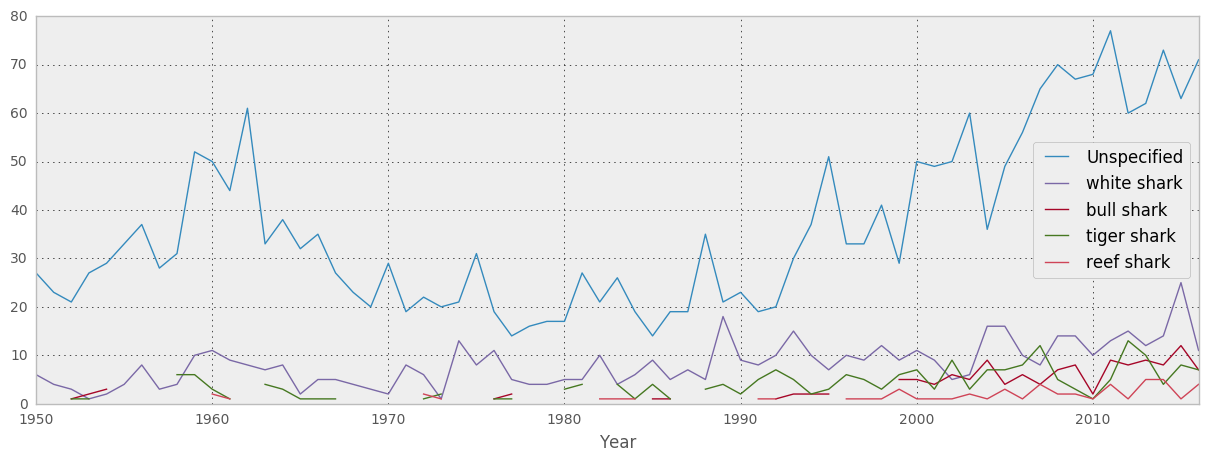

In [23]:
# Creating the top-5 and plotting the results
top5_list = ['Unspecified','white shark','bull shark','tiger shark','reef shark']
top5_sharks = pd.DataFrame()

for shark in top5_list:
    shark_attacks = createYearOverviewSpecies(yearly_df,shark)
    top5_sharks[shark] = shark_attacks

print len(top5_sharks)
print top5_sharks
top5_sharks.plot()

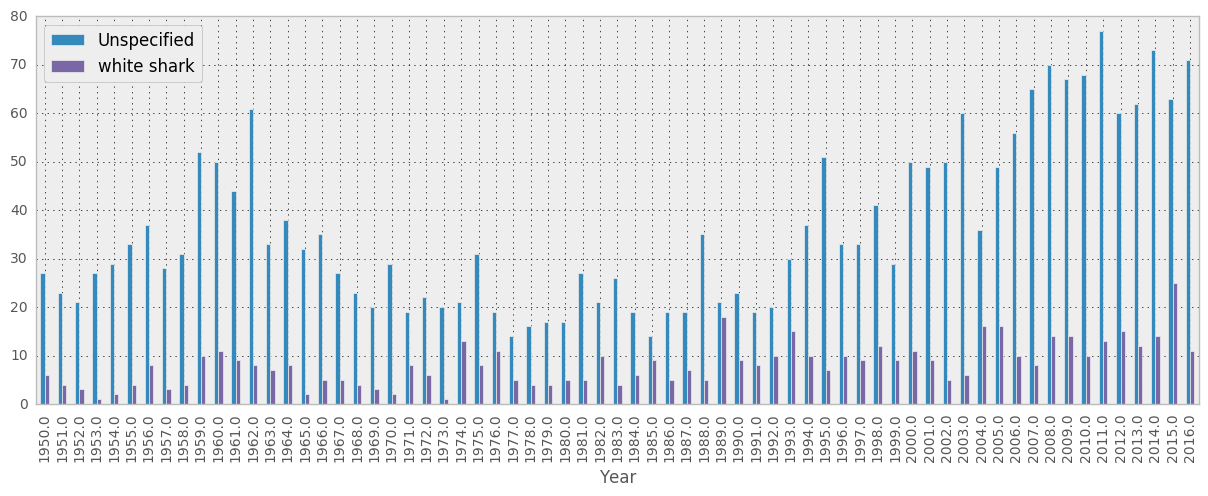

In [24]:
# Creating a top-2 and plotting it as a bar chart
top_list = ['Unspecified','white shark']
top_sharks = pd.DataFrame()

for shark in top_list:
    shark_attacks = createYearOverviewSpecies(yearly_df,shark)
    top_sharks[shark] = shark_attacks

top_sharks.plot.bar()

In [25]:
# Create a pandas Series for the number of total attacks per year
def createYearlyTotalOverview(df):
    
    #list of all the species
    species_list = df['Species filtered'].unique()
    
    #Ouput frame
    yearlyOverviewFrame = pd.DataFrame()
    
    # For each species create the yearly overview and add these to the Overview frame
    for species in species_list:
        #print species
        speciesSeries = createYearOverviewSpecies(df,species)
        yearlyOverviewFrame[species] = speciesSeries
    
    return yearlyOverviewFrame

In [26]:
# Create a pandas series with the yearly overview of all species
yearlyOveview = createYearlyTotalOverview(yearly_df)

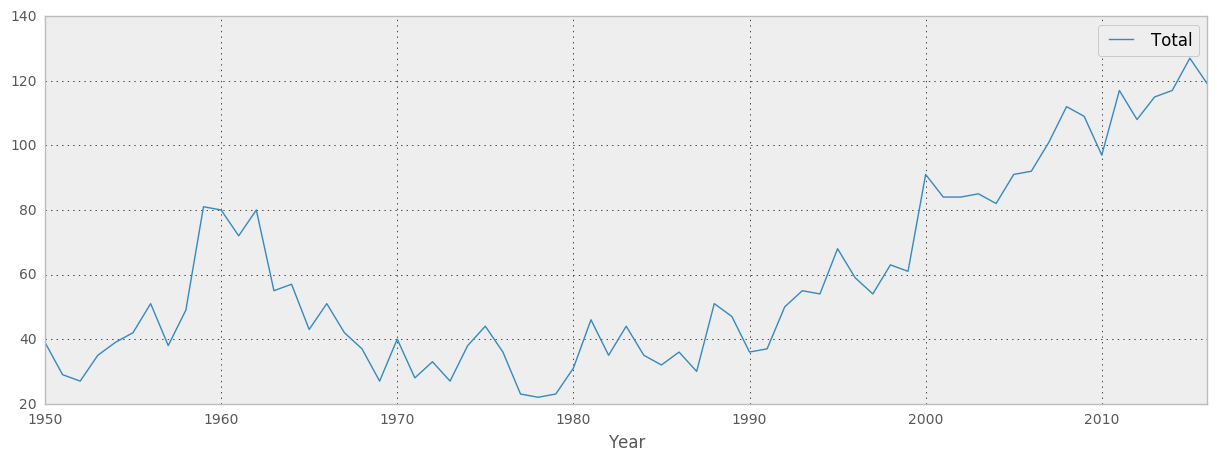

In [27]:
# Creating the total overview
total = pd.DataFrame()
total['Total'] = yearlyOveview.sum(axis=1)
#total.plot.bar()
total.plot()

In [28]:
# Sanity check: the total records over all the years starting from 1950 should add up to 3942
print total.sum(axis=0)

Total    3943.0
dtype: float64


In [29]:
# Creating the confidence limits, assuming a poisson distribution for each measurement
total['err'] = total['Total'].apply(lambda x: np.sqrt(x))
total['ptwosig'] = total['Total']+2*total['err']
total['mtwosig'] = total['Total']-2*total['err']
#print total

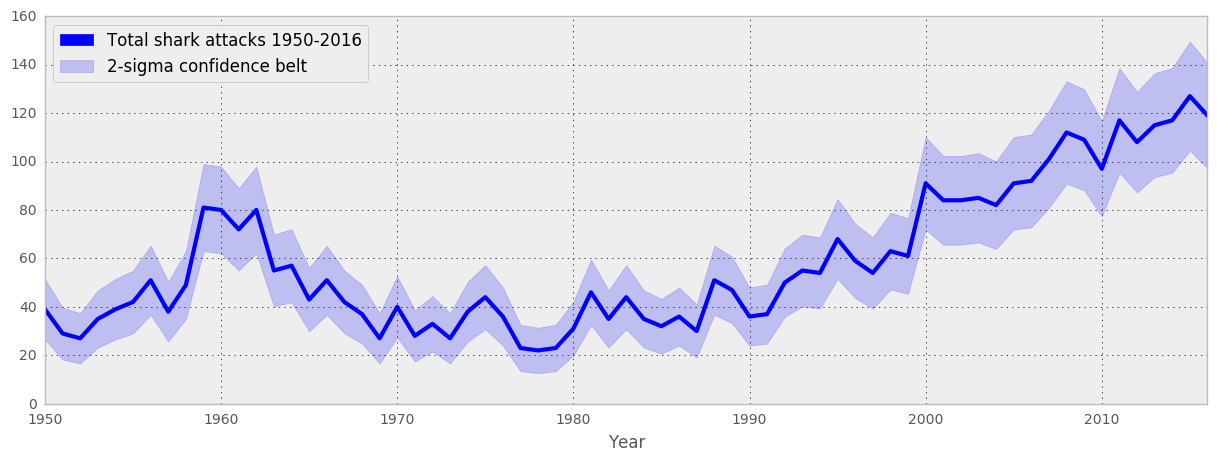

In [30]:
# Plotting the total shark attacks per year with a nice style and confidence belts
import matplotlib.patches as mpatches
plt.figure()
total['Total'].plot(linewidth=3,color='blue')
#plt.plot(total.index,total.Total,linewidth=3)
plt.fill_between(total.index, total['mtwosig'], total['ptwosig'], color='b', alpha=0.2)
blueleg  = mpatches.Patch(color='blue', label='Total shark attacks 1950-2016')
confbelt = mpatches.Patch(color='blue', alpha=0.2, label='2-sigma confidence belt')
plt.legend(handles=[blueleg,confbelt],loc=2)